# Inverse Problems Exercises: 2024s s04 (non-sc)
https://www.umm.uni-heidelberg.de/miism/

## Notes
* Please **DO NOT** change the name of the `.ipynb` file. 
* Please **DO NOT** import extra packages to solve the tasks. 
* Please put the `.ipynb` file directly into the `.zip` archive without any intermediate folder. 

## Please provide your personal information
* full name (Name): 

YOUR ANSWER HERE

Quang Minh, Ngo

## D07: Singular value decomposition

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import linalg as LA

In [30]:
file_gaussian = 'file_gaussian.npz'
with np.load(file_gaussian) as data:
    f_true = data['f_true']
    A_psf = data['A_psf']
    list_gn = data['list_gn']

### Imaging model
The imaging model can be represented by
$$
g = h \otimes f_\text{true}
= Af_\text{true}
= \mathcal{F}^{-1}\{ \mathcal{F}\{h\} \mathcal{F}\{f_\text{true}\} \},
$$
$$
g' = g + \epsilon.
$$
* $f_\text{true}$ is the input signal
* $h$ is the point spread function (kernel)
* $\otimes$ is the convolution operator
* $A$ is the Toeplitz matrix of $h$
* $\mathcal{F}$ and $\mathcal{F}^{-1}$ are the Fourier transform operator and inverse Fourier transform operator
* $\epsilon$ is the additive Gaussian noise
* $g$ is the filtered signal
* $g'$ is the noisy signal

### Frobenius norm
Implement the Frobenius norm by definition
$$
\|A\|_\text{F} = \sqrt{\sum_{i}^m\sum_{j}^n |a_{ij}|^2},
$$
where $A$ is an $m \times n$ matrix. When $m = 1$ or $n = 1$, $A$ is a vector.
* Given the matrix $A$
* Calculate the Frobenius norm (`numpy.linalg.norm()` should NOT be used.)
* Implement the function `frobenius_norm()`

In [31]:
def frobenius_norm(mat_A):
    """ Compute the Frobenius norm of the matrix:

    :param mat_A: Input matrix or vector.
    :returns: Frobenius norm.
    """
    sum = np.sum(np.square(mat_A))
    return np.sqrt(sum)

In [32]:
# This cell contains hidden tests.


### Condition number of $A$

Calculate the condition number of matrix $A$
$$
\operatorname{cond}_\text{F}(A) = \|A^{-1}\|_\text{F} \|A\|_\text{F}
$$
* Apply the calculation to `A_psf`
* Save $\|A\|_\text{F}$ in the variable `norm_A_psf` (using `frobenius_norm()`)
* Save $\|A^{-1}\|_\text{F}$ in the variable `norm_A_inv` (using `frobenius_norm()`)
* Save $\operatorname{cond}_\text{F}(A)$ in the variable `cond_A_psf` (`numpy.linalg.cond()` should not be used.)

In [33]:
# YOUR CODE HERE
norm_A_psf = frobenius_norm(A_psf)
norm_A_inv = frobenius_norm(LA.inv(A_psf))
cond_A_psf = norm_A_inv * norm_A_psf

In [34]:
# This cell contains tests.

print(cond_A_psf)


659171.3126132677


### Question: Condition number of $A$
Is the inversion of the system with `A_psf` stable?

YOUR ANSWER HERE

The condition number of A_psf is 659171.3126132677 which is very high. This shows that the inversion of the system with A_psf is NOT stable. Consequently, the numerical solutions may be highly sensitve to disturbances of the input data.  

### Singular value decomposition

Calculate the singular value decomposition (SVD) of real matrix $A$
$$
A = USV^T,
$$
where $UU^T = VV^T = I$, and $S$ is a rectangular diagonal matrix with non-negative real numbers on the diagonal. The entries on the diagonal $\operatorname{diag}(S)_i$ are the singular values.

* Apply the calculation to `A_psf` (using `numpy.linalg.svd()`)
* Plot $A$, $U$, $S$ and $V^T$ in order in the subplots of `axs`
* Plot the matrices $A$, $U$, and $V^T$ as grayscale images in the corresponding subplots
* Show the colorbar of the above three subplots
* Plot the singular values $\operatorname{diag}(S)_i$ as a line in the third subplot
* Add proper titles to the subplots of `axs`

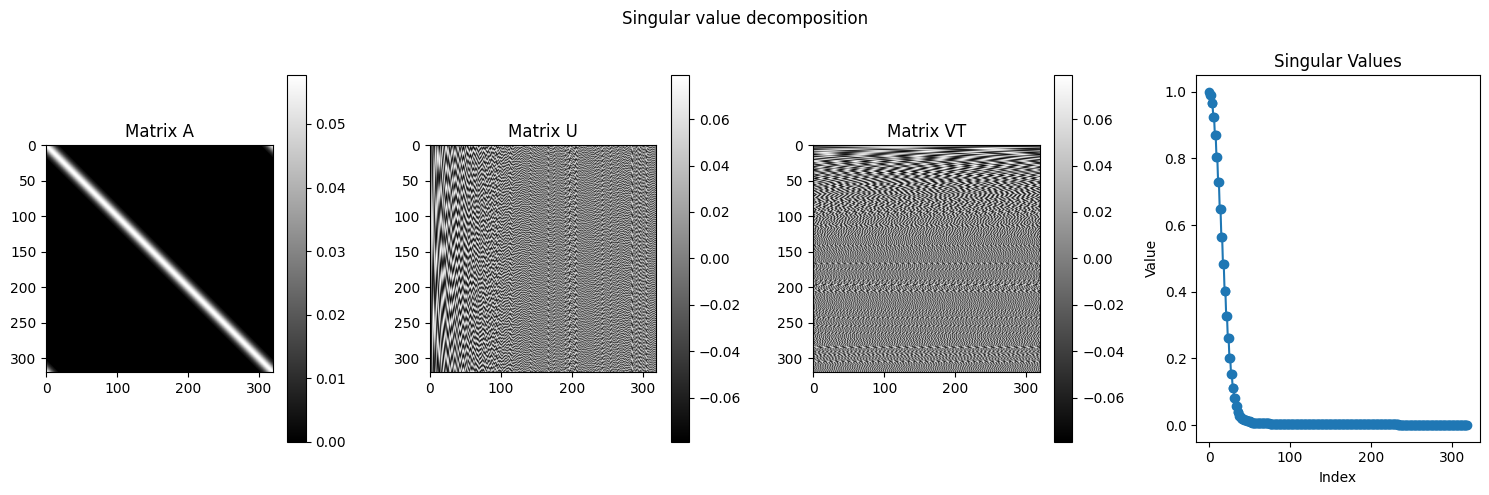

In [35]:
U, S, VT = LA.svd(A_psf)
S_matrix = np.diag(S)
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Singular value decomposition')

# Plot A
im1 = axs[0].imshow(A_psf, cmap='gray')
axs[0].set_title('Matrix A')
fig.colorbar(im1, ax=axs[0])

# Plot U
im2 = axs[1].imshow(U, cmap='gray')
axs[1].set_title('Matrix U')
fig.colorbar(im2, ax=axs[1])

# Plot VT
im3 = axs[2].imshow(VT, cmap='gray')
axs[2].set_title('Matrix VT')
fig.colorbar(im3, ax=axs[2])

# Plot singular values
axs[3].plot(S, marker='o')
axs[3].set_title('Singular Values')
axs[3].set_ylabel('Value')
axs[3].set_xlabel('Index')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust for the suptitle
plt.show()


In [36]:
# This cell contains hidden tests.


### Condition number of $S$

Calculate the condition number of matrix $S$
* Apply the calculation to the $S$ from SVD 
* Save $\|S\|_\text{F}$ in the variable `norm_S_psf` (using `frobenius_norm()`)
* Save $\|S^{-1}\|_\text{F}$ in the variable `norm_S_inv` (using `frobenius_norm()`)
* Save $\operatorname{cond}_\text{F}(S)$ in the variable `cond_S_psf` (`numpy.linalg.cond()` should not be used.)

In [37]:
# YOUR CODE HERE
# Compute the S
norm_S_psf = frobenius_norm(S_matrix)
norm_S_inv = frobenius_norm(LA.inv(S_matrix))
cond_S_psf = norm_S_inv * norm_S_psf

In [38]:
# This cell contains tests.

print(cond_S_psf)


659171.3126122752


### Question: Condition number of $S$
Is the equation $\operatorname{cond}_\text{F}(A) = \operatorname{cond}_\text{F}(S)$ valid? Why?

YOUR ANSWER HERE

The equation $\operatorname{cond}_\text{F}(A) = \operatorname{cond}_\text{F}(S)$ is not valid because the $\operatorname{cond}_\text{F}(A)$ depends not only on S but also U and V.

### Truncated singular values

$S_t$ contains the truncated singular values as
$$
\operatorname{diag}(S_t)_i = 
\begin{cases}
    \operatorname{diag}(S)_i & \operatorname{diag}(S)_i \geq \text{TH}\\
    1 & \text{otherwise} \\
\end{cases},
$$
i.e. to set the singular values in $S$ less than the threshold $\text{TH}$ to $1$.

* Set $\text{TH}$ with $2\% \cdot \max(\operatorname{diag}(S)_i)$, $10\% \cdot \max(\operatorname{diag}(S)_i)$, $50\% \cdot \max(\operatorname{diag}(S)_i)$, respectively
* Generate $S_t$
* Save $A_t = U S_t V^T$ in the variable `list_A_tsvd` (as `list` of `numpy.array`)
* Save $\operatorname{cond}_\text{F}(A_t)$ in the variable `list_cond_A_tsvd` (`numpy.linalg.cond()` should not be used.)

In [39]:
# YOUR CODE HERE
list_A_tsvd = []
list_cond_A_tsvd = []
TH = [2/100 * np.max(S_matrix), 10/100 * np.max(S_matrix), 50/100 * np.max(S_matrix)]
for th in TH:
    # Calculate S_t
    # Compare the singular values with the threshold
    S_t = np.where(S_matrix > th, S_matrix, 1)
    
    # Calculate A_t = U * S_t * VT
    A_t = np.dot(np.dot(U, S_t), VT)
    list_A_tsvd.append(A_t)
    
    # Calculate the condition number of A_t
    norm_A_t = frobenius_norm(A_t)
    norm_A_inv_t = frobenius_norm(LA.inv(A_t))
    cond_A_t = norm_A_inv_t * norm_A_t
    list_cond_A_tsvd.append(cond_A_t)

In [40]:
# This cell contains tests.

print(list_cond_A_tsvd)


[6.231169969995666e+19, 3.9119812740257085e+21, 5.942972355714612e+19]


### Reconstruction

Reconstruct the signal by
$$
\tilde{f} = A_t^{-1} g'
$$
* Apply this operation to the noisy signals in `list_gn`
* Return the outputs with different $A_t$ in `list_A_tsvd`
* Save the outputs in the variable `list_f_tsvd` (as `list` of `numpy.array`)

Display the result
* Plot the outputs in `list_f_tsvd` in the same order of the noisy signals in the subplots of `axs`
* Show the cases of the same noisy signal in the same subplot column
* Show the cases with the same $A_t$ in the same subplot row
* Plot the corresponding noisy signal in each subplot (after the filter output)
* Plot the input signal `f_true` in each subplot (after the noisy signal)
* Show the legend in each subplot
* Show the case information in the titles to the subplots

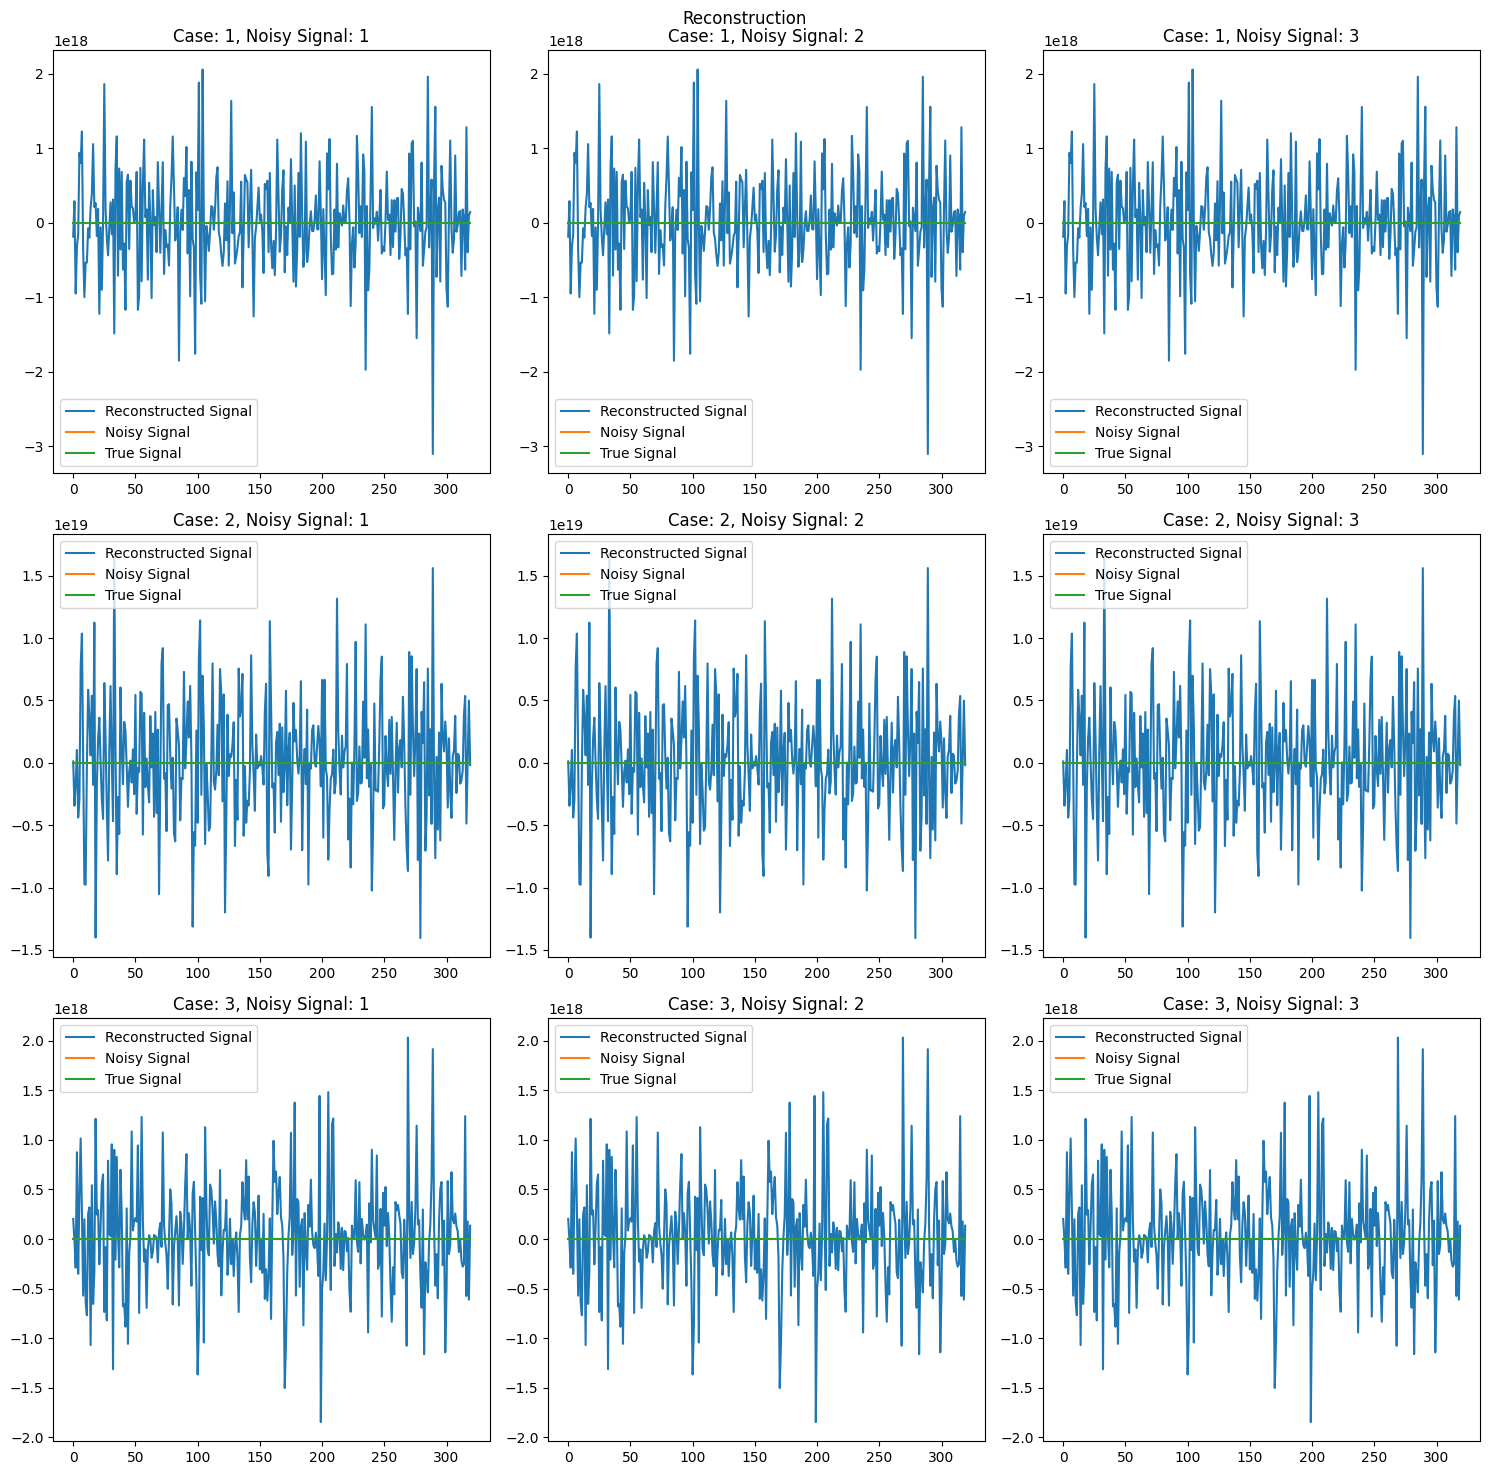

In [41]:
list_f_tsvd = [np.dot(LA.inv(A_t), g_n) for A_t, g_n in zip(list_A_tsvd, list_gn)]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Reconstruction')

for i, f_tsvd in enumerate(list_f_tsvd):
    for j, gn in enumerate(list_gn):
        axs[i, j].plot(f_tsvd, label='Reconstructed Signal')
        axs[i, j].plot(gn, label='Noisy Signal')
        axs[i, j].plot(f_true, label='True Signal')
        axs[i, j].set_title(f'Case: {i+1}, Noisy Signal: {j+1}')
        axs[i, j].legend()

plt.tight_layout()
plt.show()


In [42]:
# This cell contains hidden tests.


### Question: Truncated singular values

Describe the visual effect on the reconstruction result considering the influence of $\text{TH}$.

YOUR ANSWER HERE